In [18]:
import tensorflow as tf
import tensorflow_datasets as tfds

mnist_dataset, mnist_info = tfds.load(name='mnist', with_info=True, as_supervised=True)


mnist_train, mnist_test = mnist_dataset['train'], mnist_dataset['test']


num_epochs = 10
batch_size = 64
learning_rate = 0.001
num_hidden_units = 128

def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=10)
    return image, label

mnist_train = mnist_train.map(preprocess).shuffle(buffer_size=10000).batch(batch_size)
mnist_test = mnist_test.map(preprocess).batch(batch_size)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(num_hidden_units, activation='relu'),
    tf.keras.layers.Dense(num_hidden_units, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])



model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(mnist_train, epochs=num_epochs, verbose=2)


test_loss, test_accuracy = model.evaluate(mnist_test, verbose=2)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/10
938/938 - 10s - loss: 0.2699 - accuracy: 0.9210 - 10s/epoch - 11ms/step
Epoch 2/10
938/938 - 6s - loss: 0.1090 - accuracy: 0.9669 - 6s/epoch - 6ms/step
Epoch 3/10
938/938 - 7s - loss: 0.0733 - accuracy: 0.9772 - 7s/epoch - 7ms/step
Epoch 4/10
938/938 - 7s - loss: 0.0560 - accuracy: 0.9824 - 7s/epoch - 7ms/step
Epoch 5/10
938/938 - 6s - loss: 0.0441 - accuracy: 0.9858 - 6s/epoch - 6ms/step
Epoch 6/10
938/938 - 6s - loss: 0.0353 - accuracy: 0.9883 - 6s/epoch - 7ms/step
Epoch 7/10
938/938 - 7s - loss: 0.0282 - accuracy: 0.9907 - 7s/epoch - 7ms/step
Epoch 8/10
938/938 - 6s - loss: 0.0228 - accuracy: 0.9927 - 6s/epoch - 7ms/step
Epoch 9/10
938/938 - 5s - loss: 0.0199 - accuracy: 0.9935 - 5s/epoch - 6ms/step
Epoch 10/10
938/938 - 7s - loss: 0.0180 - accuracy: 0.9937 - 7s/epoch - 7ms/step
157/157 - 1s - loss: 0.0835 - accuracy: 0.9771 - 1s/epoch - 8ms/step
Test accuracy: 97.71%


In [19]:
model.save('mnist_mlp_model.h5')


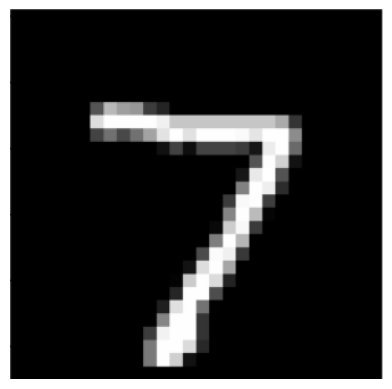

In [20]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
image_url = 'https://imgs.search.brave.com/h4NBnaPbiDtsSuB0x7pfj9w2SEmeQ2EnVK924LM0ac0/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9tYWNo/aW5lbGVhcm5pbmdt/YXN0ZXJ5LmNvbS93/cC1jb250ZW50L3Vw/bG9hZHMvMjAxOS8w/Mi9zYW1wbGVfaW1h/Z2UtMzAweDI5OC5w/bmc'
response = requests.get(image_url)
image_data = response.content
image = Image.open(BytesIO(image_data))
plt.imshow(image)
plt.axis('off')
plt.show()


In [21]:
import tensorflow as tf
import numpy as np
from PIL import Image
import requests
from io import BytesIO


model = tf.keras.models.load_model('mnist_mlp_model.h5')


image_url = 'https://imgs.search.brave.com/h4NBnaPbiDtsSuB0x7pfj9w2SEmeQ2EnVK924LM0ac0/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9tYWNo/aW5lbGVhcm5pbmdt/YXN0ZXJ5LmNvbS93/cC1jb250ZW50L3Vw/bG9hZHMvMjAxOS8w/Mi9zYW1wbGVfaW1h/Z2UtMzAweDI5OC5w/bmc'


response = requests.get(image_url)
image_data = response.content

image = Image.open(BytesIO(image_data)).convert('L')
image = image.resize((28, 28))
image = np.array(image) / 255.0


predictions = model.predict(np.expand_dims(image, axis=0))

predicted_class = np.argmax(predictions)


print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 0s 120ms/step
Predicted class: 7


In [22]:
from google.colab import files

# Upload an image file
uploaded = files.upload()


Saving Screenshot 2023-09-12 170516.png to Screenshot 2023-09-12 170516 (2).png
Saving Screenshot 2023-09-12 170530.png to Screenshot 2023-09-12 170530 (2).png
Saving Screenshot 2023-09-12 170631.png to Screenshot 2023-09-12 170631 (2).png


In [23]:

image_path = list(uploaded.keys())[0]


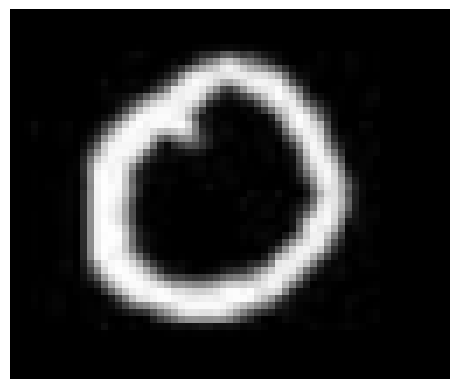

In [24]:
from PIL import Image
import matplotlib.pyplot as plt


image_path=list(uploaded.keys())[0]
image = Image.open(image_path)


plt.imshow(image)
plt.axis('off')
plt.show()


In [25]:
import tensorflow as tf
import numpy as np
from PIL import Image


model = tf.keras.models.load_model('mnist_mlp_model.h5')
image_path = list(uploaded.keys())[0]
image = Image.open(image_path).convert('L')
image = image.resize((28, 28))
image = np.array(image) / 255.0


predictions = model.predict(np.expand_dims(image, axis=0))


predicted_class = np.argmax(predictions)

print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 0s 102ms/step
Predicted class: 0


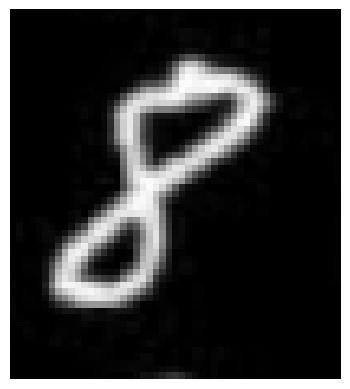

In [26]:
from PIL import Image
import matplotlib.pyplot as plt


image_path1=list(uploaded.keys())[1]
image = Image.open(image_path1)


plt.imshow(image)
plt.axis('off')
plt.show()


In [27]:
model = tf.keras.models.load_model('mnist_mlp_model.h5')
image = Image.open(image_path1).convert('L')
image = image.resize((28, 28))
image = np.array(image) / 255.0


predictions = model.predict(np.expand_dims(image, axis=0))

predicted_class = np.argmax(predictions)


print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 0s 88ms/step
Predicted class: 8


In [29]:
image_path2=list(uploaded.keys())[2]

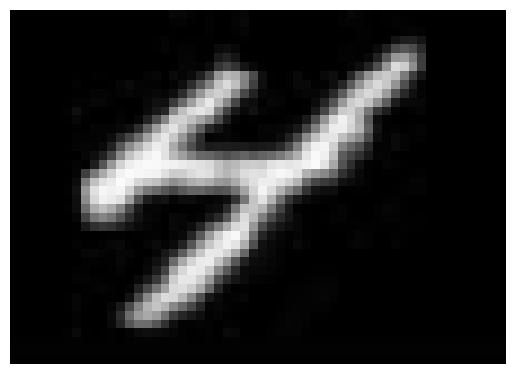

In [30]:
from PIL import Image
import matplotlib.pyplot as plt


image = Image.open(image_path2)


plt.imshow(image)
plt.axis('off')
plt.show()


In [31]:
import tensorflow as tf
import numpy as np
from PIL import Image


model = tf.keras.models.load_model('mnist_mlp_model.h5')
image_path2 = list(uploaded.keys())[2]
image = Image.open(image_path2).convert('L')
image = image.resize((28, 28))
image = np.array(image) / 255.0


predictions = model.predict(np.expand_dims(image, axis=0))


predicted_class = np.argmax(predictions)


print(f"Predicted class: {predicted_class}")


1/1 [==============================] - 0s 78ms/step
Predicted class: 4
